# Employer Project: the Bank of England

## 1. Introduction

The client for this project is the Bank of England. Here is an excerpt from the project briefing, profiling the Bank:

> The Bank of England's mission is to promote the good of the people of the United Kingdom by maintaining monetary and financial stability. The Bank of England plays a multifaceted role in the national economy. Its primary objectives include maintaining price stability and supporting the government’s economic policies. To achieve this, the Bank has control over monetary policy instruments, primarily the setting of interest rates. By altering interest rates, the Bank can influence borrowing costs for businesses and individuals, which in turn affects spending, investment, and inflation. 

More information about the Bank of England can be found [here.](https://www.bankofengland.co.uk/about)


The scenario for this project, as outlined in the briefing, is as follows: 

> Part of the job of the Bank of England is to provide reassurance and stability to financial markets. One way this is achieved is through representatives of the Bank delivering speeches at various public events. As an organisation, the Bank of England is interested in how the trends in these speeches correlate with observed events and economic indicators, as well as how the sentiment of these speeches can be used to predict market behaviour. This analysis will inform our understanding of the impact of the Bank’s communications on the economy, as well as the predictive power of using this data set.

### 1.1 Business Questions

To provide insight into the above, The Bank of England's Data Strategy & Implementation Division needs answers to the following questions:

1. Has the sentiment of central bank speeches changed over time? If so, how has it changed?
<br>
<br>
2. How does the sentiment of the Bank of England’s speeches correlate with key events such as:
    * bank rate decisions (including direction/magnitude of the change)
    * publication of the Monetary Policy Report
    * publication of the  Financial Stability Report/Review
    * any other events or trends that may be relevant or interesting?  
<br>
<br>
3. How does the sentiment of speeches correlate with key economic indicators of the UK, such as:
    * GDP growth
    * inflation
    * labour market statistics (e.g. unemployment and wages)
    * any other economic indicators that may be relevant or interesting.
<br>   
<br>
4. Do these speeches have any predictive power to assist in predicting market behaviour?
<br>
<br>
5.  Are there other insights or findings from the analysis that may be of interest to the organisation?
<br>
<br>
6.  What are the potential reasons for any of the correlations discovered above? How have you drawn these conclusions?


## 2. Goals


**1. To submit a 'Project Scope and Plan' by 18th March:**
* A 1,000-word overview and project plan covering project roles, roadmap, objectives, communications plans, work agreements, as well as a refined problem statement and draft project scope
<br>
<br>

**2. To submit an 'Initial Recommendation Pitch' by 15th April:**

* Presentation deck (pdf) covering background/context, summary of analysis and visualisation approach, data-informed recommendations and conclusion
* Presentation recording (5-10 mins) (MP4)
<br>
<br>

**3. To submit a 'Final Report and Presentation' by 22nd April:**

* Pdf Report (1,500 words (+/- 10%) describing the problem, approach, insights identified; recommendations; all aspects of presentation
* Code (file or link), submitted as private GitHub repo, Jupyter Notebook or RMarkdown (must be reproducible) 
* Presentation deck (pdf): a summary of the process followed by the group, visualised data story justifiying recommendations
* Live presentation (10-15 mins) (date TBC)
<br>
<br>

**4. To submit an 'Individual Reflection' by 22nd April:** 

* Pdf document (500 words, +/- 10%) covering reflections on how effectively the group worked together, what challenging situations we encountered and how we responded to them, what contributions we made as individuals and what was the most useful feedback we received that we can use for group projects moving forward

## 3. Data Collection & Exploration 


### 3.1 Getting the Data

The following data was provided as part of the project briefing: 

#### Core Data Sets

* "all_speeches.csv": this is a [publically-available Kaggle dataset](https://www.kaggle.com/datasets/davidgauthier/central-bank-speeches/data) comprised of a corpus of speeches from senior central bankers of various influential central banks. This corpus covers the period from 1997 until 2022. 
<br>
<br>
* "LSE_DA_BoE_Employer_project_Sentiment-labelled_wordlist.xlsx": a list of words labelled with sentiment


#### Additional Bank of England Data

* "mpcvoting.xlsx": a record of voting decisions by the Bank of England in relation to Bank Rate (6th Jun 1997-1st Feb 2024), Stock of Government Bond Purchases (4th Aug 2016-21st Sep 2023), Stock of Corporate Bond Purchases (4th Aug 2016-3rd Feb 2022) and Asset Purchase Decisions (5th Mar 2009-4th Aug 2016).   
<br>
<br>
* Links were also provided to publicly-available Bank of England reports: the ['Monetary Policy Reports'](https://www.bankofengland.co.uk/monetary-policy-report/monetary-policy-report)  and ['Financial Stability Reports'](https://www.bankofengland.co.uk/financial-stability-report/financial-stability-reports)


#### Additional Office for National Statistics (OfS) Data

* Links to publicly-available data-sets related to [GDP Growth](https://www.ons.gov.uk/economy/grossdomesticproductgdp), [Inflation and Price Indices](https://www.ons.gov.uk/economy/inflationandpriceindices) and [Labour Market Statistics](https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/employmentandemployeetypes/bulletins/uklabourmarket/previousReleases). 

<br>
The project team were encouraged to explore additional sources if relevant and helpful to the analysis.
<br>
<br>

### 3.2 Exploring the Data

We can read in the data; and at the same time check whether the data needs cleaning:

In [1]:
# Importing libraries that we will use

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
stop_words = set(stopwords.words('english'))

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
speeches= pd.read_csv('all_speeches.csv')

First, let's take a look at the first few rows of the DataFrame:

In [3]:
# taking a look at the first few rows of the dataframe:

speeches.head()

,reference,country,date,title,author,is_gov,text
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh..."


In [4]:
%%html
<style>
table {float:left}
</style>

The Kaggle metadata does nor specify what is contained in each column, but we can infer from the names that the columns contain the following information (a question on Kaggle about the dataset confirmed that in the `is_gov` column a '1' means the speech was by someone who is or was a governor, a '0' indicates otherwise):


| **Column**             | **Description**                                                                                                                                |
|:--- |:--- |
| reference                 | Speech reference number  |
| country                   | Country where the speech was made                                                                                                                 |
| date     | The date the speech was made                                                                                   |
| title | The title of the speech |
| author         | The author/speaker      |
| is_gov             | A '1' indicates that the speaker is or was a governor, a '0' indicates otherwise                                                                                            |
| text             | The text of the speech                                                                                                               |

Next, let's run speeches.info() to have a look at the number of values in each column, whether there are any null values and to see if the data types are what we would expect:

In [5]:
speeches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7721 entries, 0 to 7720
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   reference  7721 non-null   object
 1   country    7721 non-null   object
 2   date       7721 non-null   object
 3   title      7721 non-null   object
 4   author     7721 non-null   object
 5   is_gov     7721 non-null   int64 
 6   text       7721 non-null   object
dtypes: int64(1), object(6)
memory usage: 422.4+ KB


We note that there are no null values, so no gaps to fill.  

The only data type that is potentially problematic is the 'date' column, which is currently of object type. Let's convert that to a date_time data type:

In [6]:
speeches['date']=pd.to_datetime(speeches['date'],infer_datetime_format=True)

In [7]:
#checking this is now a datetime object:
speeches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7721 entries, 0 to 7720
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   reference  7721 non-null   object        
 1   country    7721 non-null   object        
 2   date       7721 non-null   datetime64[ns]
 3   title      7721 non-null   object        
 4   author     7721 non-null   object        
 5   is_gov     7721 non-null   int64         
 6   text       7721 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 422.4+ KB


In [8]:
#Let's check that the date ranges are what we expect:

display(speeches.date.min())
display(speeches.date.max())

Timestamp('1900-01-01 00:00:00')

Timestamp('2022-11-10 00:00:00')

There's an issue here: the minimum date is from the year 1900, which is outside the date range for this dataset. Let's have a look at any rows that have this date:

In [9]:
speeches.loc[speeches['date'] == '1900-01-01']

,reference,country,date,title,author,is_gov,text
4010,r000101a_SRB,sweden,1900-01-01,Swedish economy in transition,backstrom,1,Thank you for inviting me to talk with you thi...


A quick web search for this speech (see [here](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.bis.org/review/r001010a.pdf)) suggests this speech was made on 2nd Oct 2000, so we can change the date:

In [10]:
speeches['date'].replace('1900-01-01', '2000-10-02', inplace=True)

In [11]:
#Checking min and max dates again:

display(speeches.date.min())
display(speeches.date.max())

Timestamp('1990-11-28 00:00:00')

Timestamp('2022-11-10 00:00:00')

That's better- the min date is now in line with what we would expect.

Next, the reference column: let's see if we have a unique reference number of each speech:

In [12]:
speeches['reference'].nunique()

7721

It seems that we do. This may be a redundant column, but let's retain it for now. 

Next, the country column: let's check that the country names are what we would expect:

In [13]:
speeches['country'].value_counts()

euro area         2351
united states     1551
united kingdom    1209
japan              755
canada             620
sweden             600
switzerland        351
australia          284
Name: country, dtype: int64

Let's remove the whitespace from some of the country names and also capitalise the proper names:

In [14]:
speeches['country'].replace('euro area', 'Eurozone', inplace=True)
speeches['country'].replace('united states', 'US', inplace=True)
speeches['country'].replace('united kingdom', 'UK', inplace=True)
speeches['country'].replace('japan', 'Japan', inplace=True)
speeches['country'].replace('canada', 'Canada', inplace=True)
speeches['country'].replace('sweden', 'Sweden', inplace=True)
speeches['country'].replace('switzerland', 'Switzerland', inplace=True)
speeches['country'].replace('australia', 'Australia', inplace=True)

In [15]:
speeches['country'].value_counts()

Eurozone       2351
US             1551
UK             1209
Japan           755
Canada          620
Sweden          600
Switzerland     351
Australia       284
Name: country, dtype: int64

Everthing seems to be in order in this column.

Next, let's take a look at the 'title' column:

In [16]:
speeches['title'].value_counts()

NO_INFO                                                                                                     237
                                                                                                            176
Japan's Economy and Monetary Policy                                                                          61
Economic Activity, Prices, and Monetary Policy in Japan                                                      54
Introductory remarks, news conference                                                                        45
                                                                                                           ... 
Delivering a symmetric mandate with asymmetric tools: monetary policy in a context of low interest rates      1
European banking supervision – much achieved, but still much to do                                            1
The outlook for the Global Economy                                                                      

Some of the rows have titles, some are blank (in fact, after checking the csv file, each of these seemingly blank rows contain 8 spaces) and some are marked as 'NO_INFO'. Let's label all blank and 'NO_INFO' roles as 'No title recorded':

In [17]:
speeches['title'].replace('NO_INFO','No title recorded', inplace=True)

In [18]:
speeches['title'].replace('        ','No title recorded', inplace=True)

In [19]:
speeches['title'].value_counts()

No title recorded                                                                                           413
Japan's Economy and Monetary Policy                                                                          61
Economic Activity, Prices, and Monetary Policy in Japan                                                      54
Introductory remarks, news conference                                                                        45
Opening Statement before the House of Commons Standing Committee on Finance                                  42
                                                                                                           ... 
Delivering a symmetric mandate with asymmetric tools: monetary policy in a context of low interest rates      1
European banking supervision – much achieved, but still much to do                                            1
The outlook for the Global Economy                                                                      

Let's also check the author column:

In [20]:
speeches['author'].value_counts()

no_info       342
trichet       272
bernanke      209
coeure        174
carney        167
             ... 
young           1
aires           1
jackson         1
bratislava      1
cook            1
Name: author, Length: 325, dtype: int64

This seems to be in order, so let's check is_gov:

In [21]:
speeches['is_gov'].value_counts()

0    5040
1    2681
Name: is_gov, dtype: int64

As expected, the values are all either a 0 or a 1. We may decide to replace these with labels, but for now let's keep them as they are. 

Finally, we turn to our text column: we should have 7721 unique speeches:

In [22]:
speeches['text'].nunique()

7692

This is not as many as expected, so it seem there are some duplicates. Let's check this:

In [23]:
duplicate_values = speeches['text'].duplicated()
duplicate_values.value_counts()

False    7692
True       29
Name: text, dtype: int64

There are 29 duplicated speeches, let's look at them:

In [24]:
 speeches[speeches['text'].duplicated(keep=False)].head(10)

,reference,country,date,title,author,is_gov,text
564,r101026a_BOC,Canada,2010-10-26,Opening Statement before the House of Commons ...,carney,1,"Governor of the Bank of Canada Good afternoon,..."
565,r101027a_BOC,Canada,2010-10-27,Opening Statement before the Standing Senate C...,carney,1,"Governor of the Bank of Canada Good afternoon,..."
610,r120424a_BOC,Canada,2012-04-24,Opening Statement before the House of Commons ...,carney,1,Governor of the Bank of Canada Good afternoon....
611,r120425a_BOC,Canada,2012-04-25,Opening Statement before the Senate Standing C...,carney,1,Governor of the Bank of Canada Good afternoon....
624,r121030a_BOC,Canada,2012-10-30,Opening Statement before the House of Commons ...,carney,1,Governor of the Bank of Canada Good afternoon....
625,r121031a_BOC,Canada,2012-10-31,Opening Statement before the Standing Senate C...,carney,1,Governor of the Bank of Canada Good afternoon....
668,r140429a_BOC,Canada,2014-04-29,Opening Statement before the House of Commons ...,poloz,1,Governor of the Bank of Canada Thank you for t...
669,r140430a_BOC,Canada,2014-04-30,Opening Statement before the Senate Standing C...,poloz,1,Governor of the Bank of Canada Thank you for t...
1182,r020121a_ECB,Eurozone,2002-01-21,Securities and banking: bridges and walls,no_info,0,I once again find myself speaking at the Londo...
1186,r020221a_ECB,Eurozone,2002-02-21,Securities and banking: bridges and walls,schioppa,0,I once again find myself speaking at the Londo...


We can see that while the speeches are duplicated, they took place on different dates: it stands to reason that a speech may have been delivered more than once, so we can proceed with the analysis without dropping any duplicates. 

Let's just double-check that we don't have any duplicated rows:

In [25]:
# checking for duplicate rows
speeches.duplicated().value_counts()

False    7721
dtype: int64

# 4. Analysis: Has the sentiment of central bank speeches changed over time? If so, how has it changed?


### 4.1 Sentiment Analysis: Vader and Textblob

To answer this question, we need to begin by performing a sentiment analysis on the text data provided. 

Since the dataset is large and could therefore mean lengthy processing time for the sentiment analysis, for now let's subset the data and look at just speeches made in the UK:

In [26]:
uk_speeches= speeches[speeches['country']=='UK'].reset_index(drop=True)

In [27]:
uk_speeches.head()

,reference,country,date,title,author,is_gov,text
0,r980915a_BOE,UK,1998-09-15,Speech,george,0,"Thank you, Chairman. I'm actually very pleased..."
1,r981021b_BOE,UK,1998-10-21,Britain in Europe,george,0,It's a great pleasure to be here in the beauti...
2,r981021a_BOE,UK,1998-10-21,Impact of the recent turbulence in internation...,king,1,Few industries have suffered more from volatil...
3,r981101a_BOE,UK,1998-11-01,"Economic policy, with and without forecasts",budd,0,My topic this evening is the use of forecasts ...
4,r981101b_BOE,UK,1998-11-01,Inflation targeting in practice: the UK experi...,vickers,0,"Six years ago this week, sterling left the exc..."


In [28]:
uk_speeches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   reference  1209 non-null   object        
 1   country    1209 non-null   object        
 2   date       1209 non-null   datetime64[ns]
 3   title      1209 non-null   object        
 4   author     1209 non-null   object        
 5   is_gov     1209 non-null   int64         
 6   text       1209 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 66.2+ KB


This UK-only dataset contains 1209 rows of data- still large enough for meaningful analysis.

Let's start preparing the text column for analysis by converting to lower case and removing all punctuation:

In [29]:
# Demo: Convert to lower case and remove punctuation.
uk_speeches['text'] = uk_speeches['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
uk_speeches['text'] = uk_speeches['text'].str.replace('[^\w\s]','',regex=True)
uk_speeches.head()

,reference,country,date,title,author,is_gov,text
0,r980915a_BOE,UK,1998-09-15,Speech,george,0,thank you chairman im actually very pleased to...
1,r981021b_BOE,UK,1998-10-21,Britain in Europe,george,0,its a great pleasure to be here in the beautif...
2,r981021a_BOE,UK,1998-10-21,Impact of the recent turbulence in internation...,king,1,few industries have suffered more from volatil...
3,r981101a_BOE,UK,1998-11-01,"Economic policy, with and without forecasts",budd,0,my topic this evening is the use of forecasts ...
4,r981101b_BOE,UK,1998-11-01,Inflation targeting in practice: the UK experi...,vickers,0,six years ago this week sterling left the exch...


We can also add a column containing the number of characters in each piece of text, so we have insight into how long each one is:

In [30]:
uk_speeches['len']=uk_speeches['text'].str.len()

Now we can use the SentimentIntensityAnalyzer:
* the 'neg', 'neu' and 'pos' columns indicate the degree to which the sentiment falls into these categories, from 0 to 1 (0 meaning the lowest amount of that sentiment detected, 1 meaning the highest amount)
* the 'compound' score from -1 to +1 indicates the overall sentiment expressed: -1 means extremely negative overall sentiment, +1 means extremely positive.

In [31]:
%%time 

# Demo: Sentiment intensity analysis using Vadar sentiment and a for loop.
sia = SentimentIntensityAnalyzer()
dft = pd.DataFrame(columns=['neg', 'neu', 'pos', 'compound'])
for j in uk_speeches.index:
    score = sia.polarity_scores(uk_speeches.iloc[j,6])
    new_row = pd.DataFrame({'neg': score['neg'], 'neu': score['neu'], 'pos': score['pos'], 'compound': score['compound']}, index=[j])
    dft = pd.concat([dft, new_row], ignore_index=True)
uk_speeches = pd.concat([uk_speeches, dft], axis=1, join="inner")
uk_speeches.head()

CPU times: total: 19min 30s
Wall time: 23min 18s


,reference,country,date,title,author,is_gov,text,len,neg,neu,pos,compound
0,r980915a_BOE,UK,1998-09-15,Speech,george,0,thank you chairman im actually very pleased to...,13409,0.084,0.820,0.095,0.9925
1,r981021b_BOE,UK,1998-10-21,Britain in Europe,george,0,its a great pleasure to be here in the beautif...,23792,0.068,0.776,0.156,0.9999
2,r981021a_BOE,UK,1998-10-21,Impact of the recent turbulence in internation...,king,1,few industries have suffered more from volatil...,13403,0.078,0.805,0.117,0.9984
3,r981101a_BOE,UK,1998-11-01,"Economic policy, with and without forecasts",budd,0,my topic this evening is the use of forecasts ...,27066,0.051,0.860,0.088,0.9996
4,r981101b_BOE,UK,1998-11-01,Inflation targeting in practice: the UK experi...,vickers,0,six years ago this week sterling left the exch...,26996,0.068,0.840,0.092,0.9991


Next, we can also look at the polarity and subjectivity using Textblob:
* Polarity lies between -1 (meaning that most words express negative sentiment) and +1 (most words express positive sentiment)

* Subjectivity lies between 0 and 1, closer to 0 meaning that the sentiment is more fact-based, whereas closer to one means more personal-opinion-based

In [32]:
%%time
# Demo: Using a self defined function with Textblob to calculate polarity and subjectivity.
def generate_polarity_subjectivity(dfs):
    dft2 = TextBlob(dfs).sentiment
    return pd.Series([dft2[0], dft2[1]])

# Apply the function to the data and add two new columns
uk_speeches[['polarity','subjectivity']] = uk_speeches['text'].apply(generate_polarity_subjectivity)
uk_speeches.head()

CPU times: total: 24.6 s
Wall time: 29.2 s


,reference,country,date,title,author,is_gov,text,len,neg,neu,pos,compound,polarity,subjectivity
0,r980915a_BOE,UK,1998-09-15,Speech,george,0,thank you chairman im actually very pleased to...,13409,0.084,0.820,0.095,0.9925,0.083288,0.435206
1,r981021b_BOE,UK,1998-10-21,Britain in Europe,george,0,its a great pleasure to be here in the beautif...,23792,0.068,0.776,0.156,0.9999,0.076711,0.368726
2,r981021a_BOE,UK,1998-10-21,Impact of the recent turbulence in internation...,king,1,few industries have suffered more from volatil...,13403,0.078,0.805,0.117,0.9984,0.091432,0.394993
3,r981101a_BOE,UK,1998-11-01,"Economic policy, with and without forecasts",budd,0,my topic this evening is the use of forecasts ...,27066,0.051,0.860,0.088,0.9996,0.086707,0.476692
4,r981101b_BOE,UK,1998-11-01,Inflation targeting in practice: the UK experi...,vickers,0,six years ago this week sterling left the exch...,26996,0.068,0.840,0.092,0.9991,0.058467,0.394488


We now have a measure of negative, neutral, positive and overall (compound) sentiment in each speech, plus a measure of its polarity and degree of subjectivity.

Let's round each of these columns to two decimal places:

In [33]:
uk_speeches=uk_speeches.round({'neg':2,'neu':2,'pos':2,'compound':2,'polarity':2,'subjectivity':2})

In [34]:
uk_speeches.head()

,reference,country,date,title,author,is_gov,text,len,neg,neu,pos,compound,polarity,subjectivity
0,r980915a_BOE,UK,1998-09-15,Speech,george,0,thank you chairman im actually very pleased to...,13409,0.08,0.82,0.10,0.99,0.08,0.44
1,r981021b_BOE,UK,1998-10-21,Britain in Europe,george,0,its a great pleasure to be here in the beautif...,23792,0.07,0.78,0.16,1.00,0.08,0.37
2,r981021a_BOE,UK,1998-10-21,Impact of the recent turbulence in internation...,king,1,few industries have suffered more from volatil...,13403,0.08,0.80,0.12,1.00,0.09,0.39
3,r981101a_BOE,UK,1998-11-01,"Economic policy, with and without forecasts",budd,0,my topic this evening is the use of forecasts ...,27066,0.05,0.86,0.09,1.00,0.09,0.48
4,r981101b_BOE,UK,1998-11-01,Inflation targeting in practice: the UK experi...,vickers,0,six years ago this week sterling left the exch...,26996,0.07,0.84,0.09,1.00,0.06,0.39


Let's take a look at the first speech and identify the most common words:

In [35]:
%%time
# Demo: Frequency distribution review of a single speech.

# Tokenise the text data.
stop_words=set(stopwords.words('english'))
filtered_text = []

# Example speech using iloc to reference (Hint: Can be used in loops if required).
tokenized_word = word_tokenize(uk_speeches.iloc[0,6])

# Filter the tokenised words.
for each_word in tokenized_word:
    if each_word.lower() not in stop_words and each_word.isalpha():
        filtered_text.append(each_word.lower())

# Display the filtered list.
#print('Tokenised list without stop words: {}'.format(filtered_text))

# Create a frequency distribution object.
freq_dist_of_words = FreqDist(filtered_text)

# Show the five most common elements in the data set.
freq_dist_of_words.most_common(10)

CPU times: total: 0 ns
Wall time: 45.5 ms


[('economy', 26),
 ('inflation', 22),
 ('growth', 15),
 ('policy', 13),
 ('demand', 13),
 ('employment', 10),
 ('whole', 9),
 ('sectors', 9),
 ('know', 8),
 ('capacity', 8)]

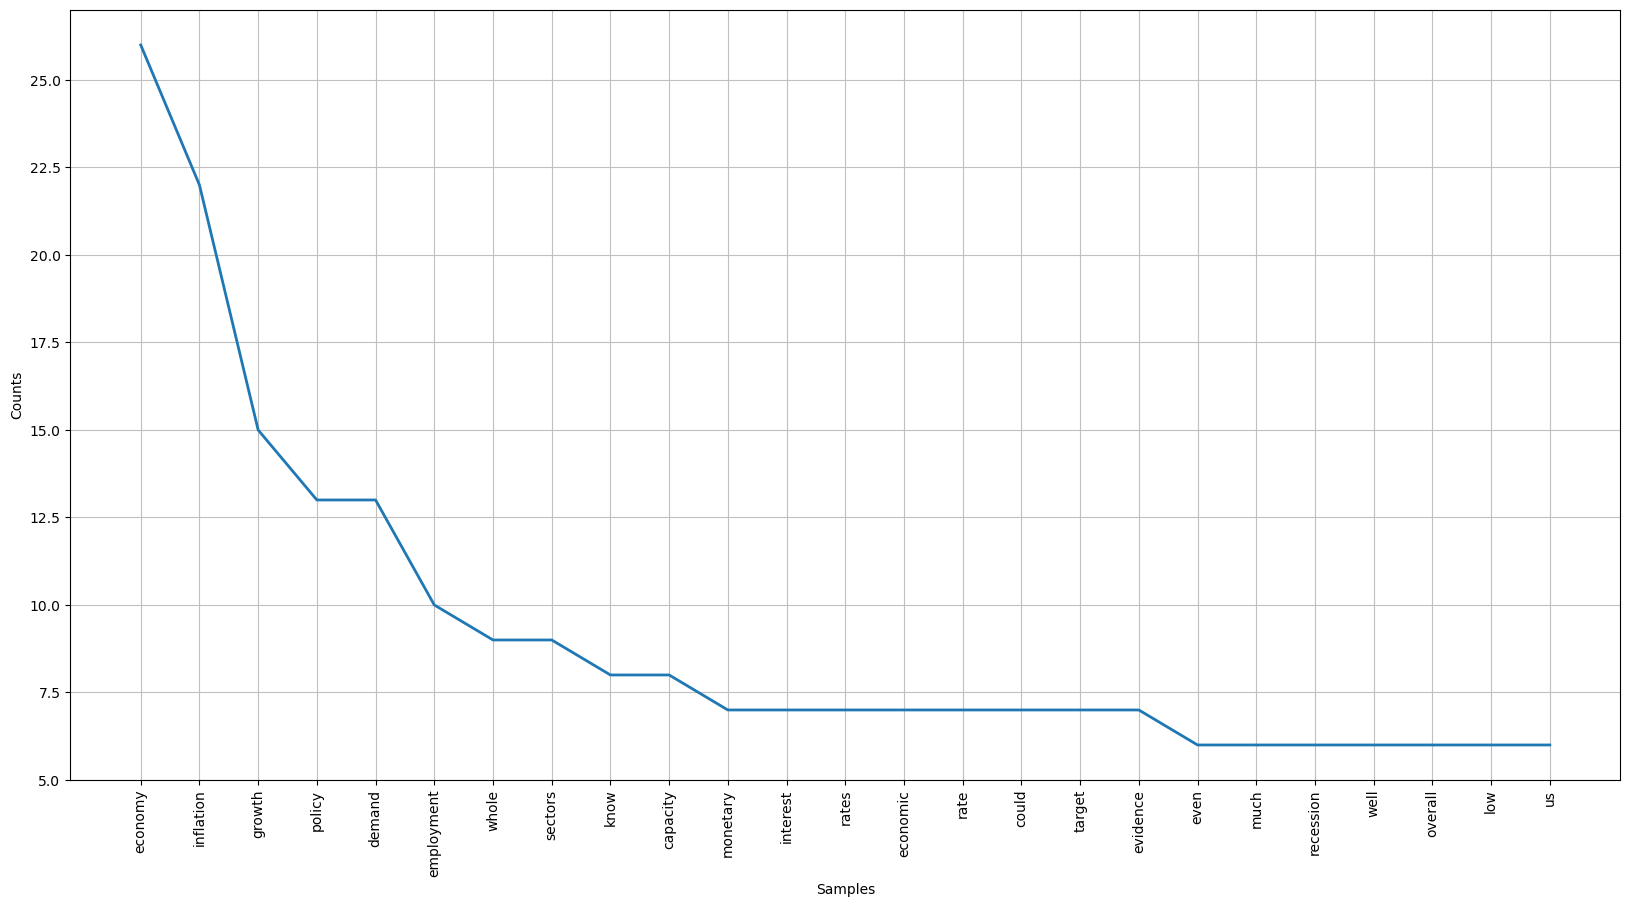

In [36]:
# Set plotting options and plot the data.
fig, ax = plt.subplots(dpi=100)
fig.set_size_inches(20, 10)
freq_dist_of_words.plot(25, cumulative=False)
plt.show()

### 4.2 Sentiment Analysis: Implementation of lexicon-based classifier based on the provided Loughran-McDonald word list

Bag-of-words approach inspired by https://wrds-www.wharton.upenn.edu/pages/classroom/sec-filings-dictionary-based-sentiment-analysis/
Types of sentiments measured by Loughran-McDonald dictionary:
* Positive = words with good connotations (e.g. "best", "accomplish", "innovativeness")
* Negative = words with bad connotations (e.g. "indict", "abandon", "default")
* Litigious = litigation-related words (e.g. "claimant", "tort", "absolves")
* Uncertainity = words indicating imprecision (e.g. "approximate", "almost", "contingency")
* Strong modal = words expressing certainty of an action (e.g. "always", "definitely", "never")
* Weak modal = words expressing uncertainty of an action (e.g. "almost", "could", "might")
* Constraining = words related to constraints (e.g. "required", "obligations", "commit")

In [37]:
# Create simple df from LM wordlist csv file
df_lm = pd.read_csv('LM_wordlist.csv')

In [38]:
# Sense-check df
df_lm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3880 entries, 0 to 3879
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Word          3880 non-null   object
 1   Negative      3880 non-null   int64 
 2   Positive      3880 non-null   int64 
 3   Uncertainty   3880 non-null   int64 
 4   Litigious     3880 non-null   int64 
 5   Strong        3880 non-null   int64 
 6   Weak          3880 non-null   int64 
 7   Constraining  3880 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 242.6+ KB


In [39]:
# retrieve unique values in all sentiments columns
df_lm.columns
for x in [c for c in df_lm.columns.tolist() if c!='Word']:
    print(f' Unique values in {x} column: {df_lm[x].unique().tolist()}')

 Unique values in Negative column: [1, 0]
 Unique values in Positive column: [0, 1]
 Unique values in Uncertainty column: [0, 1]
 Unique values in Litigious column: [0, 1]
 Unique values in Strong column: [0, 1]
 Unique values in Weak column: [0, 1]
 Unique values in Constraining column: [0, 1]


In [40]:
# Create Python dictionary from df for LM lexicon
dict_lm = {}
for x in [c for c in df_lm.columns.tolist() if c!='Word']:
    dict_lm[x] = df_lm[df_lm[x] == 1]['Word'].tolist()

In [41]:
# Sanity-check LM lexicon Python dictionary
print(dict_lm.keys())
print()
for x in dict_lm.keys():
    print(f'{x} : {len(dict_lm[x])} words ({len(dict_lm[x]) - len(set(dict_lm[x]))} duplicates)')
print()


dict_keys(['Negative', 'Positive', 'Uncertainty', 'Litigious', 'Strong', 'Weak', 'Constraining'])

Negative : 2355 words (0 duplicates)
Positive : 358 words (0 duplicates)
Uncertainty : 297 words (0 duplicates)
Litigious : 905 words (0 duplicates)
Strong : 19 words (0 duplicates)
Weak : 27 words (0 duplicates)
Constraining : 184 words (0 duplicates)



In [42]:
# view positive words by way of an example
print(f"Positive words: {dict_lm['Positive']}")

Positive words: ['ABLE', 'ABUNDANCE', 'ABUNDANT', 'ACCLAIMED', 'ACCOMPLISH', 'ACCOMPLISHED', 'ACCOMPLISHES', 'ACCOMPLISHING', 'ACCOMPLISHMENT', 'ACCOMPLISHMENTS', 'ACHIEVE', 'ACHIEVED', 'ACHIEVEMENT', 'ACHIEVEMENTS', 'ACHIEVES', 'ACHIEVING', 'ADEQUATELY', 'ADVANCEMENT', 'ADVANCEMENTS', 'ADVANCES', 'ADVANCING', 'ADVANTAGE', 'ADVANTAGED', 'ADVANTAGEOUS', 'ADVANTAGEOUSLY', 'ADVANTAGES', 'ALLIANCE', 'ALLIANCES', 'ASSURE', 'ASSURED', 'ASSURES', 'ASSURING', 'ATTAIN', 'ATTAINED', 'ATTAINING', 'ATTAINMENT', 'ATTAINMENTS', 'ATTAINS', 'ATTRACTIVE', 'ATTRACTIVENESS', 'BEAUTIFUL', 'BEAUTIFULLY', 'BENEFICIAL', 'BENEFICIALLY', 'BENEFIT', 'BENEFITED', 'BENEFITING', 'BENEFITTED', 'BENEFITTING', 'BEST', 'BETTER', 'BOLSTERED', 'BOLSTERING', 'BOLSTERS', 'BOOM', 'BOOMING', 'BOOST', 'BOOSTED', 'BREAKTHROUGH', 'BREAKTHROUGHS', 'BRILLIANT', 'CHARITABLE', 'COLLABORATE', 'COLLABORATED', 'COLLABORATES', 'COLLABORATING', 'COLLABORATION', 'COLLABORATIONS', 'COLLABORATIVE', 'COLLABORATOR', 'COLLABORATORS', 'COMPLI

In [43]:
# check for words from LM lexicon that are also in stop words and remove those from stop words
lm_words_in_stop_words = df_lm[df_lm['Word'].str.lower().isin(stop_words)]['Word'].str.lower().tolist()
print(f'The following words from LM lexicon are also in stop_words: {lm_words_in_stop_words}')
print(f'Length of stop_words set: {len(stop_words)}')
print(f'Removing from stop_words set the following words: {lm_words_in_stop_words}')
for w in lm_words_in_stop_words:
    stop_words.remove(w)
print(f'Length of stop_words set after cleanup: {len(stop_words)}')

The following words from LM lexicon are also in stop_words: ['against', 'will']
Length of stop_words set: 179
Removing from stop_words set the following words: ['against', 'will']
Length of stop_words set after cleanup: 177


In [44]:
# pick sample speech for testing purposes
sample = uk_speeches.iloc[5]['text']

In [45]:
# tokenize sample text:
tokens = word_tokenize(sample)
print(f'Text has {len(tokens)} tokens.')

Text has 2303 tokens.


In [46]:
#filter out stop words
filtered_tokens = [t for t in tokens if t not in stop_words]
print(f'Filtered text has {len(filtered_tokens)} tokens.')

Filtered text has 1148 tokens.


In [47]:
# generate frequency distribution
freqdist = FreqDist(filtered_tokens)

In [48]:
# check top 100 most frequent words
print(f'Top 100 most frequent words: {freqdist.most_common(100)}')

Top 100 most frequent words: [('economy', 26), ('growth', 19), ('rate', 13), ('year', 12), ('inflation', 11), ('2', 10), ('recession', 9), ('policy', 9), ('headlines', 8), ('past', 8), ('time', 8), ('even', 8), ('demand', 8), ('monetary', 8), ('facts', 7), ('world', 7), ('output', 7), ('whole', 7), ('sectors', 7), ('will', 7), ('slowdown', 6), ('next', 6), ('say', 6), ('point', 6), ('price', 6), ('evidence', 6), ('around', 6), ('economic', 5), ('12', 5), ('years', 5), ('well', 5), ('one', 5), ('forecasts', 5), ('since', 5), ('uk', 5), ('tighten', 5), ('overall', 5), ('would', 5), ('order', 4), ('things', 4), ('last', 4), ('3', 4), ('two', 4), ('data', 4), ('fall', 4), ('credit', 4), ('underlying', 4), ('target', 4), ('much', 4), ('rates', 4), ('including', 4), ('course', 4), ('stability', 4), ('put', 3), ('recent', 3), ('read', 3), ('serious', 3), ('1997', 3), ('1', 3), ('certainly', 3), ('average', 3), ('annual', 3), ('trend', 3), ('latest', 3), ('month', 3), ('ago', 3), ('best', 3), 

In [49]:
# create dataframe from frequency distribution 
df_freqdist = pd.DataFrame(freqdist.items(), columns=['word', 'frequency'])

In [50]:
# sense check frequency distribution dataframe
print(df_freqdist.info())
print(df_freqdist.head(20))
print(f"sum of all values in frequency column: {df_freqdist['frequency'].sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   word       638 non-null    object
 1   frequency  638 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 10.1+ KB
None
           word  frequency
0           let          2
1           put          3
2        recent          3
3     newspaper          1
4     headlines          8
5     alongside          2
6         facts          7
7         order          4
8        things          4
9   perspective          1
10        first          1
11        world          7
12      economy         26
13         read          3
14     meltdown          2
15      warning          1
16         wake          1
17     economic          5
18     slowdown          6
19           g7          1
sum of all values in frequency column: 1148


In [51]:
# obtaining total of words appearing in sample from each sentiment
for k in dict_lm.keys():
    print(f"{k} : {df_freqdist[df_freqdist['word'].str.upper().isin(dict_lm[k])]['frequency'].sum()}") 

Negative : 68
Positive : 39
Uncertainty : 27
Litigious : 1
Strong : 17
Weak : 13
Constraining : 3


In [52]:
# create function for code reuse
def get_lm_scores(text):
    tokens = word_tokenize(text)
    filtered_tokens = [t for t in tokens if t not in stop_words]
    num_filtered_tokens = len(filtered_tokens)
    freqdist = FreqDist(filtered_tokens)
    df_freqdist = pd.DataFrame(freqdist.items(), columns=['word', 'frequency'])
    output = {}
    output['num_filtered_tokens'] = num_filtered_tokens
    for k in dict_lm.keys():
        output['num_' + k] = df_freqdist[df_freqdist['word'].str.upper().isin(dict_lm[k])]['frequency'].sum()
        output[k + '_ratio'] = df_freqdist[df_freqdist['word'].str.upper().isin(dict_lm[k])]['frequency'].sum() / num_filtered_tokens 
    return output 

In [53]:
# create function for code reuse, optimised for use with 'apply' function on pandas dfs
def get_lm_scores_list(text):
    tokens = word_tokenize(text)
    filtered_tokens = [t for t in tokens if t not in stop_words]
    num_filtered_tokens = len(filtered_tokens)
    freqdist = FreqDist(filtered_tokens)
    df_freqdist = pd.DataFrame(freqdist.items(), columns=['word', 'frequency'])
    output = []
    output.append(num_filtered_tokens)
    for k in dict_lm.keys():
        output.append(df_freqdist[df_freqdist['word'].str.upper().isin(dict_lm[k])]['frequency'].sum())
        output.append(df_freqdist[df_freqdist['word'].str.upper().isin(dict_lm[k])]['frequency'].sum() / num_filtered_tokens) 
    return pd.Series(output) 

In [54]:
# test functions (1)
print(get_lm_scores(sample))
print()
print(pd.Series(list(get_lm_scores(sample).values())))
print()
print(get_lm_scores_list(sample))

{'num_filtered_tokens': 1148, 'num_Negative': 68, 'Negative_ratio': 0.059233449477351915, 'num_Positive': 39, 'Positive_ratio': 0.03397212543554007, 'num_Uncertainty': 27, 'Uncertainty_ratio': 0.023519163763066203, 'num_Litigious': 1, 'Litigious_ratio': 0.0008710801393728223, 'num_Strong': 17, 'Strong_ratio': 0.014808362369337979, 'num_Weak': 13, 'Weak_ratio': 0.01132404181184669, 'num_Constraining': 3, 'Constraining_ratio': 0.002613240418118467}

0     1148.000000
1       68.000000
2        0.059233
3       39.000000
4        0.033972
5       27.000000
6        0.023519
7        1.000000
8        0.000871
9       17.000000
10       0.014808
11      13.000000
12       0.011324
13       3.000000
14       0.002613
dtype: float64

0     1148.000000
1       68.000000
2        0.059233
3       39.000000
4        0.033972
5       27.000000
6        0.023519
7        1.000000
8        0.000871
9       17.000000
10       0.014808
11      13.000000
12       0.011324
13       3.000000
14       0

In [55]:
# tests function (2)
print(get_lm_scores(uk_speeches.iloc[1]['text']))
print()
print(list(get_lm_scores(uk_speeches.iloc[1]['text']).keys()))
print()
print(pd.Series(list(get_lm_scores(uk_speeches.iloc[1]['text']).values())))
print()
print(get_lm_scores_list(uk_speeches.iloc[1]['text']))

{'num_filtered_tokens': 2085, 'num_Negative': 87, 'Negative_ratio': 0.041726618705035974, 'num_Positive': 82, 'Positive_ratio': 0.039328537170263786, 'num_Uncertainty': 52, 'Uncertainty_ratio': 0.024940047961630695, 'num_Litigious': 6, 'Litigious_ratio': 0.0028776978417266188, 'num_Strong': 39, 'Strong_ratio': 0.01870503597122302, 'num_Weak': 30, 'Weak_ratio': 0.014388489208633094, 'num_Constraining': 16, 'Constraining_ratio': 0.007673860911270983}

['num_filtered_tokens', 'num_Negative', 'Negative_ratio', 'num_Positive', 'Positive_ratio', 'num_Uncertainty', 'Uncertainty_ratio', 'num_Litigious', 'Litigious_ratio', 'num_Strong', 'Strong_ratio', 'num_Weak', 'Weak_ratio', 'num_Constraining', 'Constraining_ratio']

0     2085.000000
1       87.000000
2        0.041727
3       82.000000
4        0.039329
5       52.000000
6        0.024940
7        6.000000
8        0.002878
9       39.000000
10       0.018705
11      30.000000
12       0.014388
13      16.000000
14       0.007674
dtype: fl

In [56]:
lm_scores = ['num_filtered_tokens', 'num_Negative', 'Negative_ratio', 'num_Positive', 
             'Positive_ratio', 'num_Uncertainty', 'Uncertainty_ratio', 'num_Litigious',
             'Litigious_ratio', 'num_Strong', 'Strong_ratio', 'num_Weak', 'Weak_ratio', 
             'num_Constraining', 'Constraining_ratio']

In [57]:
uk_speeches[lm_scores] = uk_speeches['text'].apply(get_lm_scores_list)

In [58]:
uk_speeches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   reference            1209 non-null   object        
 1   country              1209 non-null   object        
 2   date                 1209 non-null   datetime64[ns]
 3   title                1209 non-null   object        
 4   author               1209 non-null   object        
 5   is_gov               1209 non-null   int64         
 6   text                 1209 non-null   object        
 7   len                  1209 non-null   int64         
 8   neg                  1209 non-null   float64       
 9   neu                  1209 non-null   float64       
 10  pos                  1209 non-null   float64       
 11  compound             1209 non-null   float64       
 12  polarity             1209 non-null   float64       
 13  subjectivity         1209 non-nul

In [59]:
# renaming columns to distinguish between Vader, TextBlob and LM scores
uk_speeches = uk_speeches.rename(columns={
    'neg': 'vader_neg',
    'neu': 'vader_neu',
    'pos': 'vader_pos',
    'compound': 'vader_compound',
    'polarity': 'textblob_polarity',
    'subjectivity': 'textblob_subjectivity',
    'num_filtered_tokens': 'lm_num_filtered_tokens',
    'num_Negative': 'lm_num_negative',
    'Negative_ratio': 'lm_negative_ratio',
    'num_Positive': 'lm_num_positive',
    'Positive_ratio': 'lm_positive_ratio',
    'num_Uncertainty': 'lm_num_uncertainty',
    'Uncertainty_ratio': 'lm_uncertainty_ratio',
    'num_Litigious': 'lm_num_litigious',
    'Litigious_ratio': 'lm_litigious_ratio',
    'num_Strong': 'lm_num_strong',
    'Strong_ratio': 'lm_strong_ratio',
    'num_Weak': 'lm_num_weak',
    'Weak_ratio': 'lm_weak_ratio',
    'num_Constraining': 'lm_num_constraining',
    'Constraining_ratio': 'lm_constraining_ratio'})

In [60]:
uk_speeches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   reference               1209 non-null   object        
 1   country                 1209 non-null   object        
 2   date                    1209 non-null   datetime64[ns]
 3   title                   1209 non-null   object        
 4   author                  1209 non-null   object        
 5   is_gov                  1209 non-null   int64         
 6   text                    1209 non-null   object        
 7   len                     1209 non-null   int64         
 8   vader_neg               1209 non-null   float64       
 9   vader_neu               1209 non-null   float64       
 10  vader_pos               1209 non-null   float64       
 11  vader_compound          1209 non-null   float64       
 12  textblob_polarity       1209 non-null   float64 

In [61]:
uk_speeches.head()

,reference,country,date,title,author,is_gov,text,len,vader_neg,vader_neu,...,lm_num_uncertainty,lm_uncertainty_ratio,lm_num_litigious,lm_litigious_ratio,lm_num_strong,lm_strong_ratio,lm_num_weak,lm_weak_ratio,lm_num_constraining,lm_constraining_ratio
0,r980915a_BOE,UK,1998-09-15,Speech,george,0,thank you chairman im actually very pleased to...,13409,0.08,0.82,...,24.0,0.020942,3.0,0.002618,20.0,0.017452,16.0,0.013962,2.0,0.001745
1,r981021b_BOE,UK,1998-10-21,Britain in Europe,george,0,its a great pleasure to be here in the beautif...,23792,0.07,0.78,...,52.0,0.024940,6.0,0.002878,39.0,0.018705,30.0,0.014388,16.0,0.007674
2,r981021a_BOE,UK,1998-10-21,Impact of the recent turbulence in internation...,king,1,few industries have suffered more from volatil...,13403,0.08,0.80,...,49.0,0.040164,2.0,0.001639,11.0,0.009016,17.0,0.013934,5.0,0.004098
3,r981101a_BOE,UK,1998-11-01,"Economic policy, with and without forecasts",budd,0,my topic this evening is the use of forecasts ...,27066,0.05,0.86,...,90.0,0.038927,11.0,0.004758,31.0,0.013408,42.0,0.018166,15.0,0.006488
4,r981101b_BOE,UK,1998-11-01,Inflation targeting in practice: the UK experi...,vickers,0,six years ago this week sterling left the exch...,26996,0.07,0.84,...,119.0,0.047638,21.0,0.008407,19.0,0.007606,49.0,0.019616,12.0,0.004804
